In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [6]:
import torch
from networkforall import Network

actor_0 = Network(24, 512, 256, 2, actor=True)
actor_1 = Network(24, 512, 256, 2, actor=True)

checkpoint = torch.load('model_dir/2021_01_16_13_53/episode-8500.pt')
actor_0.load_state_dict(checkpoint[0]['actor_params'])
actor_1.load_state_dict(checkpoint[1]['actor_params'])
actor_0.eval()
actor_1.eval()

Network(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
)

In [3]:
print(checkpoint[0]["actor_params"]["fc1.weight"].shape)
print(checkpoint[0]["actor_params"]["fc2.weight"].shape)
print(checkpoint[0]["actor_params"]["fc3.weight"].shape)

torch.Size([512, 24])
torch.Size([256, 512])
torch.Size([2, 256])


In [4]:
checkpoint[0]["actor_optim_params"]["param_groups"]
checkpoint[0]["critic_optim_params"]["param_groups"]

[{'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0.0001,
  'amsgrad': False,
  'params': [0, 1, 2, 3, 4, 5]}]

In [7]:
rewards_overall = np.zeros(2)

for episode in range(2):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    obs = [agent_obs for agent_obs in states]
    
    for episode_t in range(1000):

        agent_0_action = actor_0(torch.from_numpy(obs[0]).float()).detach().numpy()
        agent_1_action = actor_1(torch.from_numpy(obs[1]).float()).detach().numpy()
        
        actions_array = np.stack([agent_0_action,agent_1_action])
        
        env_info = env.step(actions_array)[brain_name]  

        next_states = env_info.vector_observations
        next_obs = [agent_obs for agent_obs in next_states]

        rewards = np.array(env_info.rewards)
        
        dones = np.array(env_info.local_done)

        obs = next_obs
        
        rewards_overall += rewards
        
        if np.any(dones):
            break
            
print(rewards_overall/(episode+1)) # average rewards over 100 episodes without noise

[1.65800002 1.66800002]


In [8]:
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [30]:
event_acc = EventAccumulator("./log/2021_01_16_13_53/events.out.tfevents.1610826834.DESKTOP-TG3J2C8")
event_acc.Reload()
# event_acc.Tags()

In [31]:
w_times, step_nums, vals = zip(*event_acc.Scalars('result/final_metric'))

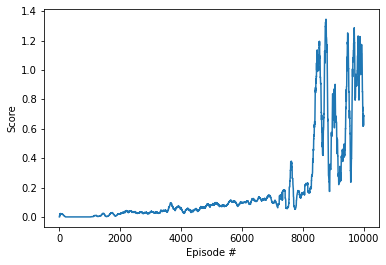

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(step_nums, vals)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()